# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from jcopml.plot import plot_missing_value

sw_indo = stopwords.words('indonesian') 
import string

import seaborn as sns

# 2. Import Dataset

In [2]:
df = pd.read_csv('kompas.csv')
df.head()

,teks
0,Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...
1,Jakarta Dikangkangi Para Preman\nKALAU tak pun...
2,Penyimpangan di Setpres Seolah Terjadi Sekaran...
3,"Dibayarkan, Rapel Kenaikan Gaji Pegawai Pos\nK..."
4,"Stop Kekerasan, Elite agar Duduk Bersama\nSeju..."


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teks    2008 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [4]:
df.shape

(2008, 1)

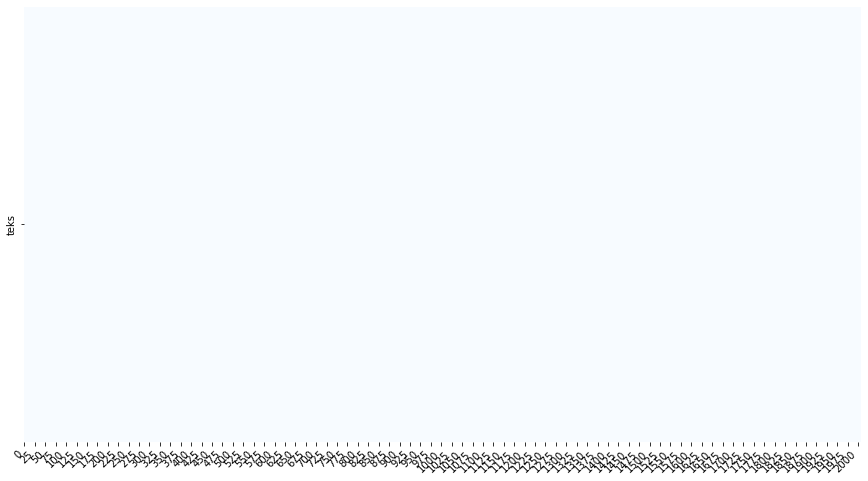

In [5]:
plot_missing_value(df)

### Data Description

In [6]:
df.head()

,teks
0,Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...
1,Jakarta Dikangkangi Para Preman\nKALAU tak pun...
2,Penyimpangan di Setpres Seolah Terjadi Sekaran...
3,"Dibayarkan, Rapel Kenaikan Gaji Pegawai Pos\nK..."
4,"Stop Kekerasan, Elite agar Duduk Bersama\nSeju..."


In [7]:
df.describe()

,teks
count,2008
unique,2008
top,Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...
freq,1


### Count a Character in Text Message

In [8]:
df['Character'] = df['teks'].apply(len)
df.head()

,teks,Character
0,Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...,7828
1,Jakarta Dikangkangi Para Preman\nKALAU tak pun...,7472
2,Penyimpangan di Setpres Seolah Terjadi Sekaran...,3098
3,"Dibayarkan, Rapel Kenaikan Gaji Pegawai Pos\nK...",1479
4,"Stop Kekerasan, Elite agar Duduk Bersama\nSeju...",5961


<AxesSubplot:ylabel='Frequency'>

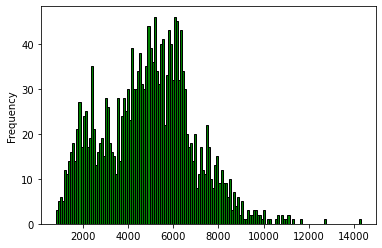

In [9]:
# Visualize a length of Character in text message

df['Character'].plot.hist(bins = 150, edgecolor='black',color='green')

In [10]:
df.Character.describe()

count     2008.000000
mean      4910.549801
std       1988.177740
min        827.000000
25%       3464.250000
50%       4993.500000
75%       6182.750000
max      14284.000000
Name: Character, dtype: float64

In [11]:
#Grab the maximum character in text document

df[df['Character'] == 14284]['teks'].iloc[0]

'Wawancara "Kompas" dengan Captain Abdul Rozaq  Saya Buat Sungai Seolah-olah "Runway"-nya\n\nDENGAN dua mesin mati, tidak  ada  pilihan  bagi  Captain Abdul Rozaq (45) dan kopilot senior Heryadi Gunawan (46), kecuali melakukan ditching, pendaratan darurat, di Sungai Bengawan Solo bagi Boeing 737-300 Garuda Indonesia pada Rabu sore, 16 Januari lalu.  \n\nKota Yogyakarta yang ditujunya sebenarnya tidak begitu jauh lagi, tetapi daya luncur pesawat diperkirakan tidak cukup untuk bermanuver melewati perbukitan untuk mencapainya.  \n\nSebaliknya, sawah yang terbentang dan terlihat begitu pesawat berhasil keluar dari awan gelap yang membalutnya sekitar lima menit mencekamkan tidak dipilih mengingat pendaratan di tanah berisiko lebih tinggi jatuh korban dibanding di atas air sungai. Secara kebetulan juga, tidak ada dataran tinggi di sekitarnya.  \n\nDalam kondisi kritis, hitungan detik, kedua pilot sempat bertukar pikiran. Gunawan yang semula menyarankan mendarat di sawah menerima usulan capta

### Visualize Label Distribution

array([[<AxesSubplot:title={'center':'Character'}>]], dtype=object)

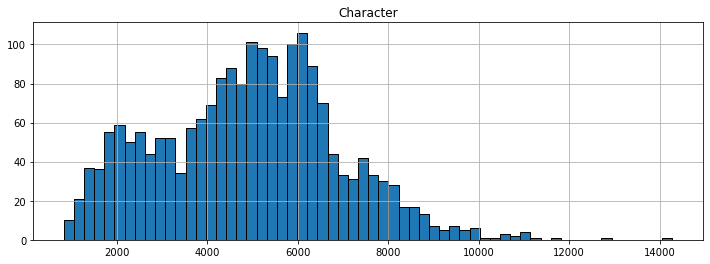

In [12]:
df.hist(column='Character', bins =60, figsize=(12,4), edgecolor='black')

## Cleaning Dataset

In [13]:
df.teks

0       Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...
1       Jakarta Dikangkangi Para Preman\nKALAU tak pun...
2       Penyimpangan di Setpres Seolah Terjadi Sekaran...
3       Dibayarkan, Rapel Kenaikan Gaji Pegawai Pos\nK...
4       Stop Kekerasan, Elite agar Duduk Bersama\nSeju...
                              ...                        
2003    Tersangka Peledakan Granat di Bulungan Ditangk...
2004    Soal Operasi Pasar Murni Beras   Pedagang Yaki...
2005    Penjualan Indomobil Langgar Prosedur\n\nSelain...
2006    Belum Jelas Motif  Peledakan Granat di Blok M\...
2007    ANALISIS EKONOMI SJAHRIR    BBM dan PKPS: Menu...
Name: teks, Length: 2008, dtype: object

In [14]:
def clean_data(text):
    clean_word = word_tokenize(text.lower())
    clean_word = [word for word in clean_word if word not in punctuation]
    clean_word = [word for word in clean_word if word not in sw_indo]
    clean_word = ' '.join(clean_word)
    return clean_word

In [15]:
df

,teks,Character
0,Ginandjar Tetap Ditahan. Jaksa Agung Dilaporka...,7828
1,Jakarta Dikangkangi Para Preman\nKALAU tak pun...,7472
2,Penyimpangan di Setpres Seolah Terjadi Sekaran...,3098
3,"Dibayarkan, Rapel Kenaikan Gaji Pegawai Pos\nK...",1479
4,"Stop Kekerasan, Elite agar Duduk Bersama\nSeju...",5961
...,...,...
2003,Tersangka Peledakan Granat di Bulungan Ditangk...,2118
2004,Soal Operasi Pasar Murni Beras Pedagang Yaki...,6266
2005,Penjualan Indomobil Langgar Prosedur\n\nSelain...,8329
2006,Belum Jelas Motif Peledakan Granat di Blok M\...,2161


In [16]:
df.teks = df.teks.apply(clean_data)
df.teks

0       ginandjar ditahan jaksa agung dilaporkan polri...
1       jakarta dikangkangi preman nyali uang berjuala...
2       penyimpangan setpres presiden abdurrahman wahi...
3       dibayarkan rapel kenaikan gaji pegawai pos ken...
4       stop kekerasan elite duduk intelektual tokoh m...
                              ...                        
2003    tersangka peledakan granat bulungan ditangkap ...
2004    operasi pasar murni beras pedagang ampuh mered...
2005    penjualan indomobil langgar prosedur mengabaik...
2006    motif peledakan granat blok m jumat 4/1 petang...
2007    analisis ekonomi sjahrir bbm pkps penyelesaian...
Name: teks, Length: 2008, dtype: object

# 4. TFIDF Similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer(ngram_range=(1,2), tokenizer= word_tokenize, stop_words= sw_indo)
tfidf_matrix = tfidf.fit_transform(df.teks)

In [21]:
df.head()

,teks,Character
0,ginandjar ditahan jaksa agung dilaporkan polri...,7828
1,jakarta dikangkangi preman nyali uang berjuala...,7472
2,penyimpangan setpres presiden abdurrahman wahi...,3098
3,dibayarkan rapel kenaikan gaji pegawai pos ken...,1479
4,stop kekerasan elite duduk intelektual tokoh m...,5961


In [22]:
similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix)
similarity

array([[1.        , 0.01057682, 0.01191387, ..., 0.00854629, 0.00770265,
        0.01542632]])

In [23]:
similarity.argsort()

array([[1131,  932, 1593, ...,  215,  144,    0]], dtype=int64)

### Menguji kemiripan antara dokumen yang diuji (dokumen 1 index ke-0) dengan dokumen index ke 144 dan 215

In [24]:
df.teks[0][:200]

'ginandjar ditahan jaksa agung dilaporkan polri kejaksaan agung memutuskan menahan tersangka korupsi ginandjar kartasasmita batas ditentukan kuhap kuasa hukum ginandjar senin 16/4 malam 24.30 ruang tah'

In [25]:
df.teks[144][:200]

'kejaksaan agung terbitkan surat penahanan kejaksaan agung kejagung menerbitkan surat perintah penahanan mantan menteri pertambangan energi ginandjar kartasasmita surat perintah penahanan nomor 052/f/s'

In [26]:
df.teks[215][:200]

'kuasa hukum ginandjar bertahan rutan kuasa hukum ginandjar kartasasmita selasa 17/4 22.00 bertahan ruang tahanan rutan kejaksaan agung kejagung selasa pagi mengirimkan surat resmi kejagung isinya keja'

`Hasil dari pengecekan antar dokumennya ternyata mirip`

### Menguji ketidakmiripan antara dokumen yang diuji (dokumen 1 index ke-0) dengan dokumen dengan index ke 932

In [27]:
df.teks[0][:200]

'ginandjar ditahan jaksa agung dilaporkan polri kejaksaan agung memutuskan menahan tersangka korupsi ginandjar kartasasmita batas ditentukan kuhap kuasa hukum ginandjar senin 16/4 malam 24.30 ruang tah'

In [28]:
df.teks[932][:200]

'pusat pengolahan ikan asin lhokseumawe terbakar pusat pengolahan ikan asin kawasan pasar ikan lhokseumawe aceh terbakar berton-ton stok ikan asin sabtu 13/1 siang 25 gudang pengolahan ikan asin 120 gu'

```json
Bisa dilihat, ternyata index ke 932 ini topic beritanya sangat berbeda dengan index ke-0.

- Dokumen index ke-0 = Memberitakan pak Ginandjar Kertasasmita ditahan 
- Dokumen index ke-932 = Memberitakan Pengolahan Ikan Asin Lhokseumawe Terbakar
```

_________

# Keyword Extraction

In [29]:
tfidf = TfidfVectorizer(ngram_range=(1,2), tokenizer= word_tokenize, stop_words= sw_indo + list(punctuation))
tfidf_matrix = tfidf.fit_transform(df.teks)

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['``'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [30]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words=['ada', 'adalah', 'adanya', 'adapun', 'agak',
                            'agaknya', 'agar', 'akan', 'akankah', 'akhir',
                            'akhiri', 'akhirnya', 'aku', 'akulah', 'amat',
                            'amatlah', 'anda', 'andalah', 'antar', 'antara',
                            'antaranya', 'apa', 'apaan', 'apabila', 'apakah',
                            'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x0000022B43A7A8B0>,
                use_idf=True, vo

In [31]:
vocab = tfidf.get_feature_names()
vocab

["'45",
 "'45 ``",
 "'45 dasar",
 "'45 hasilkan",
 "'45 indonesia",
 "'45 menolak",
 "'45 menyaksikan",
 "'45 presiden",
 "'45 surono",
 "'ada",
 "'ada klien",
 "'aduh",
 "'aduh menyanyi",
 "'ain",
 "'ain shamms",
 "'akan",
 "'akan dilaksanakan",
 "'akan diusulkan",
 "'alim",
 "'alim direktur",
 "'aman",
 "'aman dugaan",
 "'amm",
 "'amm kh",
 "'amunisi",
 "'amunisi instrumen",
 "'amunisi menyebabkan",
 "'anda",
 "'anda dibentuk",
 "'anu",
 "'anu sengaja",
 "'arabi",
 "'arabi melarang",
 "'arafah",
 "'arafah arafah-",
 "'aromanya",
 "'aromanya daerah",
 "'asli",
 "'asli sempurna",
 "'asy'ari",
 "'asy'ari pendiri",
 "'baku",
 "'baku bae",
 "'bandeng",
 "'bandeng imlek",
 "'banyak",
 "'banyak orang",
 "'bedah",
 "'bedah rampung",
 "'berarti",
 "'berarti bicara",
 "'bersih",
 "'bersih pendeta",
 "'borgol",
 "'borgol membelenggu",
 "'bout",
 "'bout thing",
 "'bruneigate",
 "'bruneigate membuktikan",
 "'bu",
 "'bu panas",
 "'buku",
 "'buku putih",
 "'buloggate",
 "'buloggate 'bruneigate",
 "

In [32]:
#10 karaketer pertama

vocab[:10]

["'45",
 "'45 ``",
 "'45 dasar",
 "'45 hasilkan",
 "'45 indonesia",
 "'45 menolak",
 "'45 menyaksikan",
 "'45 presiden",
 "'45 surono",
 "'ada"]

In [33]:
#10 karater terakhir

vocab[-10:]

['zuniga memilih',
 'zunnatul',
 'zunnatul mafruhah',
 'zurich',
 'zurich northholt',
 'zw',
 'zw suparman',
 'zw tim',
 'zx',
 'zx diserbu']

In [34]:
#Menyortir nilai matrix dari yang terkecil hingga terbesar

sorted_tfidf = tfidf_matrix[0].toarray()[0].argsort()
sorted_tfidf

array([     0, 363122, 363121, ..., 383482, 433548, 167179], dtype=int64)

### Create a function

In [35]:
def extract_keywords_tfidf(doc, tfidf, topk=10): 
    matrix = tfidf.transform([doc])
    vocab = tfidf.get_feature_names()
    
    sorted_tfidf = matrix[0].toarray()[0].argsort()
    return [vocab[idx] for idx in reversed (sorted_tfidf[-topk:])]

### Try with new document
Source of news: https://tirto.id/f7qD

In [36]:
text = """
Setelah dihantam badai krisis moneter 1997/1998, ekonomi Indonesia butuh sekitar enam tahun untuk pulih. Dalam hal keluar dari krisis, Indonesia bisa disebut tertinggal dibandingkan dengan negara-negara lain yang mengalami nasib serupa. 
Mereka umumnya hanya butuh dua tahun untuk pemulihan ekonomi. Politik membuat proses pemulihan ekonomi lebih sulit dan kompleks. Pada tahun 2004, ekonomi Indonesia akhirnya bisa kembali tumbuh 5%. 
Setelah itu, pertumbuhan ekonomi Indonesia secara perlahan merayap naik. Booming harga komoditas ikut mendorong perekonomian Indonesia. 
Harga-harga komoditas ekspor utama Indonesia seperti minyak sawit, batu bara, tembaga, dan karet ikut terkerek. 
Berkat booming ini, neraca perdagangan Indonesia mengalami surplus. Pada saat bersamaan, harga minyak mentah dunia juga ikut dalam tren kenaikan.
Menurut data Energy Information Administration (EIA), harga minyak WTI yang pada era 1990-an hanya di kisaran 20 dolar AS per barel, meningkat menjadi rata-rata 31 dolar AS per barel pada 2003.
Pada 2005, harga minyak mentah WTI rata-rata ada di kisaran 57 dolar AS per barel, dan meningkat lagi menjadi 66 dolar AS per barel pada 2006.
Pada 2007, harga minyak WTI sudah ada di kisaran 85 dolar AS per barel. Menurut EIA, kenaikan harga minyak terutama dipicu peningkatan permintaan akibat kuatnya laju pertumbuhan ekonomi.
Pada 2006, permintaan minyak dunia meningkat hingga 1,1 juta barel per hari. Dari sisi suplai, OPEC justru memutuskan untuk memangkas produksinya.
Sementara produksi dari non-OPEC tidak bisa menyamai level peningkatan konsumsi. Kenaikan harga minyak mentah dunia itu secara otomatis meningkatkan subsidi BBM. 
Pada saat itu, hampir 20% dari belanja APBN dihabiskan untuk subsidi BBM. Sebagian besar subsidi BBM itu diketahui tidak tepat sasaran. 
Pemerintahan Susilo Bambang Yudhoyono akhirnya memutuskan untuk menaikkan harga BBM dua kali yakni pada Maret dan Oktober 2005 untuk mengurangi tekanan pada APBN. 
Pada Maret, harga bensin premium naik 33%, solar 27%. Sementara pada Oktober, kenaikannya lebih besar yakni 88% untuk jenis premium dan 105% untuk solar.
Kenaikan harga BBM itu disambut oleh aksi demonstrasi di berbagai wilayah di Indonesia. Kenaikan harga minyak terus berlanjut, puncaknya terjadi pada kuartal kedua 2008, saat harga minyak melonjak menembus 120 dolar AS per barel. 
Pemerintah akhirnya kembali menaikkan harga BBM pada Mei 2008 yakni 33% untuk premium dan 28% untuk solar. Di tengah tekanan akibat lonjakan harga minyak, ekonomi mendapatkan pukulan dari krisis finansial global. 
Kali ini, episentrumnya adalah Amerika Serikat. Krisis Subprime Mortgage Tanda-tanda krisis finansial mulai muncul pada Agustus 2007, saat BNP Paribas membekukan pendanaannya.
Dilansir dari The Guardian, kondisi BNP Paribas itu mengindikasikan mereka tidak memiliki cara untuk menilai aset-aset mereka yang kompleks yang dikenal sebagai collateralised debt obligations (CDOs). 
Setelah itu, satu per satu institusi finansial atau perbankan yang punya eksposur subprime mortgage terungkap mengalami kesulitan finansial. Puncaknya, pada 15 September 2008, Lehman Brothers mendaftarkan kebangkrutannya, menyusul kegagalan di pasar subprime mortgage. 
Kebangkrutan merupakan opsi terakhir setelah Bank of America dan Barclays menarik diri dari negosiasi untuk mengambil alih salah satu bank investasi tertua di Amerika Serikat tersebut. 
Lehman diketahui sudah mengalami kerugian hingga 60 miliar dolar AS akibat eksposur di pasar subprime mortgage. Pasar finansial dunia langsung dilanda kepanikan. 
Pada hari itu, indeks Dow Jones ditutup merosot hingga 504,48 poin atau 4,4% ke level 10917,51. Ini merupakan penurunan terburuk sejak peristiwa 9/11. 
S&P 500 anjlok 4,7% dan Nasdaq anjlok 3,6%. Harga minyak ikut terdampak dan turun di bawah 100 dolar AS per barel yakni ke level 95,71 dolar AS per barel. 
Sementara emas sebagai safe haven langsung melonjak 22,50 dolar ke level 787 dolar per ons. Menyusul Lehman, dua bank investasi lainnya yakni Bear Sterns dan Merril Lynch harus diambil alih oleh bank lain. 
Sementara Morgan Stanley dan Goldman Sachs beralih dari bank investasi menjadi bank komersial. Krisis subprime mortgage terjadi akibat pecahnya gelembung industri properti yang terjadi di AS. 
Jauh sebelum krisis ini terjadi, pada akhir era 1990-an, Amerika Serikat menjadi tempat tujuan dana-dana asing. Likuiditas berlimpah hingga akhirnya menekan tingkat suku bunga.
Rezim suku bunga rendah berlaku di AS mulai awal tahun 2000-an. Kredit menjadi bergairah. Dalam kondisi suku bunga rendah, investor berbondong-bondong mencari aset-aset yang mampu memberikan imbal hasil tinggi, termasuk pada aset-aset berisiko tinggi seperti produk derivatif.
Bank-bank pun menjadi semakin “kreatif” melahirkan produk-produk finansial yang rumit dalam bentuk produk derivatif. Produk-produk derivatif dengan menggunakan Kredit Pemilikan Rumah (KPR) sebagai underlying asset terus bermunculan.
Produk-produk ini diciptakan untuk mengalihkan risiko kredit dari KPR. Bibit-bibit krisis muncul karena perbankan di AS tidak selektif dalam memberikan kredit, termasuk kepada nasabah yang memiliki profil risiko tinggi atau dikenal dengan subprime mortgage.
Debitur-debitur ini umumnya tidak memenuhi syarat untuk mendapatkan kredit prime mortgage ataupun Alt-A mortgage, karena tingginya risiko yang dilihat dari penghasilan, sejarah kredit, dan kelengkapan dokumen. 
Debitur subprime mortgage umumnya dikenakan biaya administrasi dan suku bunga yang lebih tinggi dibandingkan debitur prime mortgage. Bank tergiur karena akan mendapatkan imbal hasil yang lebih tinggi, meski risikonya lebih besar. 
Kredit subprime mortgage juga gencar diberikan dengan keyakinan bahwa harga properti akan terus meningkat, sehingga nilai agunan semakin bertambah. Bank kemudian “berinovasi” melakukan sekuritisasi atas KPR. 
Produk hasil sekuritisasi ini disebut Mortgage Backed Securities (MBS) dan Collaterelized Debt Obligations (CDOs). Gagal bayar mulai terjadi ketika suku bunga The Fed dinaikkan dari kisaran 1-2% menjadi 5% pada 2007. 
Suku bunga mulai meningkat sejak tahun 2005, sejalan dengan kenaikan harga minyak mentah dunia yang memicu inflasi. Akibatnya, cicilan yang harus dibayar para peminjam juga mengalami kenaikan. 
Ditambah lagi, nilai agunan semakin turun akibat jatuhnya harga properti. Gagal bayar nasabah subprime mortgage ini menimbulkan efek domino. Institusi finansial dan perbankan sebagai kreditur mulai mengalami kesulitan likuiditas. 
Hal itu menyebabkan mereka tidak bisa memenuhi kewajibannya atas surat utang yang sudah diterbitkan dengan underlying asset KPR tersebut. Dampak selanjutnya, para investor yang memegang surat utang hasil sekuritisasi ikut mengalami kesulitan finansial. 
Hal itu menyebabkan para investor kesulitan untuk melakukan ekspansi usahanya. Pada akhirnya, hal itu merembet ke perekonomian sehingga menyebabkan kontraksi ekonomi di AS. 
Krisis subprime mortgage sangat cepat menyebar hingga lintas sektoral dan lintas negara. Ini dikarenakan para pemegang MBS tersebar luas ke berbagai belahan dunia.
Satu per satu akhirnya mulai mengalami kesulitan, dan harus mendapatkan talangan agar tidak kolaps. Krisis finansial 2008 merupakan krisis terburuk sejak Depresi Besar.
Pasar saham AS anjlok, dengan nilai pasar yang tersapu akibat krisis mencapai 8 triliun dolar AS selama periode 2007-2009. Krisis juga menyebabkan pengangguran melonjak mencapai 10% pada Oktober 2009, menurut Washington Post.
"""
    

In [37]:
extract_keywords_tfidf(text, tfidf, topk=10)

['dolar',
 'dolar as',
 'harga minyak',
 'harga',
 'finansial',
 'minyak',
 'krisis',
 'as',
 'kpr',
 'kredit']